#### important imports needed for the notebook

In [64]:
# important imports needed for the notebook
import numpy as np 
import pandas as pd
# ibraries used for machine learning
import matplotlib.pyplot as plt # for plotting
import seaborn as sns # for plotting
%matplotlib inline
from sklearn.linear_model import LogisticRegression 
from sklearn.model_selection import train_test_split 
from sklearn.model_selection import KFold # use for cross validation
from sklearn.model_selection import GridSearchCV# for tuning parameter of the models
from sklearn.ensemble import RandomForestClassifier # to import the modelrandom forest classifier model
from sklearn.neighbors import KNeighborsClassifier # to import  K Neighbors model
from sklearn.tree import DecisionTreeClassifier # to import  Decision Tree model
from sklearn import svm # to import  Support Vector Machine model
from sklearn import metrics # for the check the error and accuracy of the model

In [65]:
# import os
# for dirname,_,filenames in os.walk('/kaggle/input'):
#     for filename in filenames:
#         print(os.path.join(dirname,filename))
import os

In [66]:
dataset =pd.read_csv(r'D:\projects_interview\Heathcare\Brest cancer(ML and DL)\brest_cancer_prediction\data\data.csv')

In [67]:
dataset.head(5)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [68]:
# droping the last column 
dataset.drop('Unnamed: 32',axis=1,inplace=True)

In [69]:
dataset

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


#### transforming the diagnosis data into a binary classification problem  that is 
M:Malignant= 1

B:Benign =0

In [70]:
dataset['diagnosis']=dataset['diagnosis'].map({'M':1,'B':0})

In [71]:
dataset

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,842517,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,84300903,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,84348301,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,84358402,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,1,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,1,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,1,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,1,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


With the work of all these researchers, it is possible to determine automatically ten real-valued features for each cell nucleus in the 3-dimensional space.

We thus obtain 3 groups : Mean, Standard Error and Worst values of 10 characteristics each associated with the doctors' diagnosis (Malignant or Benign).

In [72]:
features_mean =list(dataset.columns[2:12]) # group of mean
features_standard_error =list(dataset.columns[12:22])#group of standard error 
features_worst =list(dataset.columns[22:32])#group of worst

print('---------------------------------')
print('Mean set of all features')
print(features_mean)
print(len(features_mean),'feature mean')

print('---------------------------------')
print('standard error  set of features')
print(features_standard_error)
print(len(features_standard_error),'feature mean')

print('---------------------------------')
print('worst set of  features')
print(features_worst)
print(len(features_worst),'feature mean')
print('')

print('Description of  columns in dataset') 
dataset.iloc[:,1:].describe()

---------------------------------
Mean set of all features
['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean', 'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean']
10 feature mean
---------------------------------
standard error  set of features
['radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se', 'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se', 'fractal_dimension_se']
10 feature mean
---------------------------------
worst set of  features
['radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst', 'smoothness_worst', 'compactness_worst', 'concavity_worst', 'concave points_worst', 'symmetry_worst', 'fractal_dimension_worst']
10 feature mean

Description of  columns in dataset


,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,0.372583,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,0.483918,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,0.000000,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,0.000000,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,0.000000,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,1.000000,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,1.000000,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


### Data analysis

<AxesSubplot:>

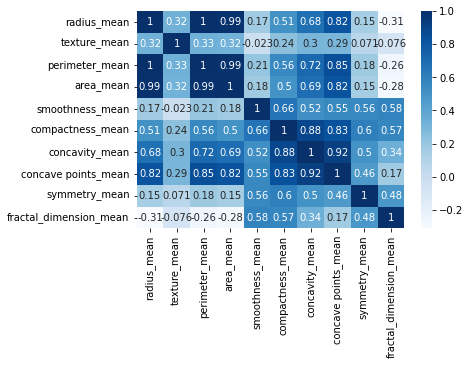

In [73]:
sns.heatmap(dataset[features_mean].corr(),annot=True,cmap='Blues')
#sns.heatmap(dataset[features_mean].corr(),annot=True,cmap='Blues')

<AxesSubplot:>

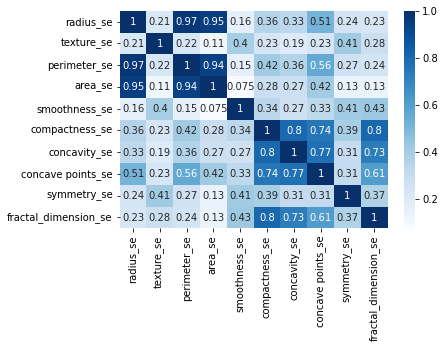

In [74]:
sns.heatmap(dataset[features_standard_error].corr(),annot=True,cmap='Blues')

<AxesSubplot:>

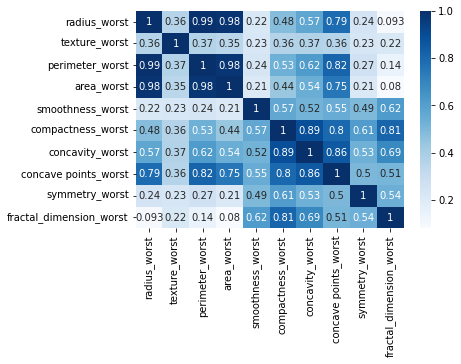

In [75]:
sns.heatmap(dataset[features_worst].corr(),annot=True,cmap='Blues')

### conclusions from heatmap
The dark blue boxes are those that are highly correlated.
 As they bring no added value to data set i will going to delete  some of them.
1. 'radius', 'perimeter' and 'area' they are highly correlated because of geometrical relationship by which they are linked. I will keep  only perimeter.

2. Also compactness', 'concavity' and 'concavepoint'  are highly correlated, in this case i will keeep 'compactness.

#### Deleting Highly correlated features

In [76]:
col_to_drop_correlated1 =['radius_mean','area_mean','radius_se','area_se','radius_worst','area_worst']
col_to_drop_correlate2 =['concavity_mean','concave points_mean','concavity_se','concave points_se','concavity_worst','concave points_worst']
dataset.drop(col_to_drop_correlated1+col_to_drop_correlate2,axis=1,inplace=True)
print('I will keep only',len(dataset.columns),'which are not so correlated')

I will keep only 20 which are not so correlated


In [77]:
dataset.head(5)

,id,diagnosis,texture_mean,perimeter_mean,smoothness_mean,compactness_mean,symmetry_mean,fractal_dimension_mean,texture_se,perimeter_se,smoothness_se,compactness_se,symmetry_se,fractal_dimension_se,texture_worst,perimeter_worst,smoothness_worst,compactness_worst,symmetry_worst,fractal_dimension_worst
0,842302,1,10.38,122.80,0.11840,0.27760,0.2419,0.07871,0.9053,8.589,0.006399,0.04904,0.03003,0.006193,17.33,184.60,0.1622,0.6656,0.4601,0.11890
1,842517,1,17.77,132.90,0.08474,0.07864,0.1812,0.05667,0.7339,3.398,0.005225,0.01308,0.01389,0.003532,23.41,158.80,0.1238,0.1866,0.2750,0.08902
2,84300903,1,21.25,130.00,0.10960,0.15990,0.2069,0.05999,0.7869,4.585,0.006150,0.04006,0.02250,0.004571,25.53,152.50,0.1444,0.4245,0.3613,0.08758
3,84348301,1,20.38,77.58,0.14250,0.28390,0.2597,0.09744,1.1560,3.445,0.009110,0.07458,0.05963,0.009208,26.50,98.87,0.2098,0.8663,0.6638,0.17300
4,84358402,1,14.34,135.10,0.10030,0.13280,0.1809,0.05883,0.7813,5.438,0.011490,0.02461,0.01756,0.005115,16.67,152.20,0.1374,0.2050,0.2364,0.07678


### Univariate analysis

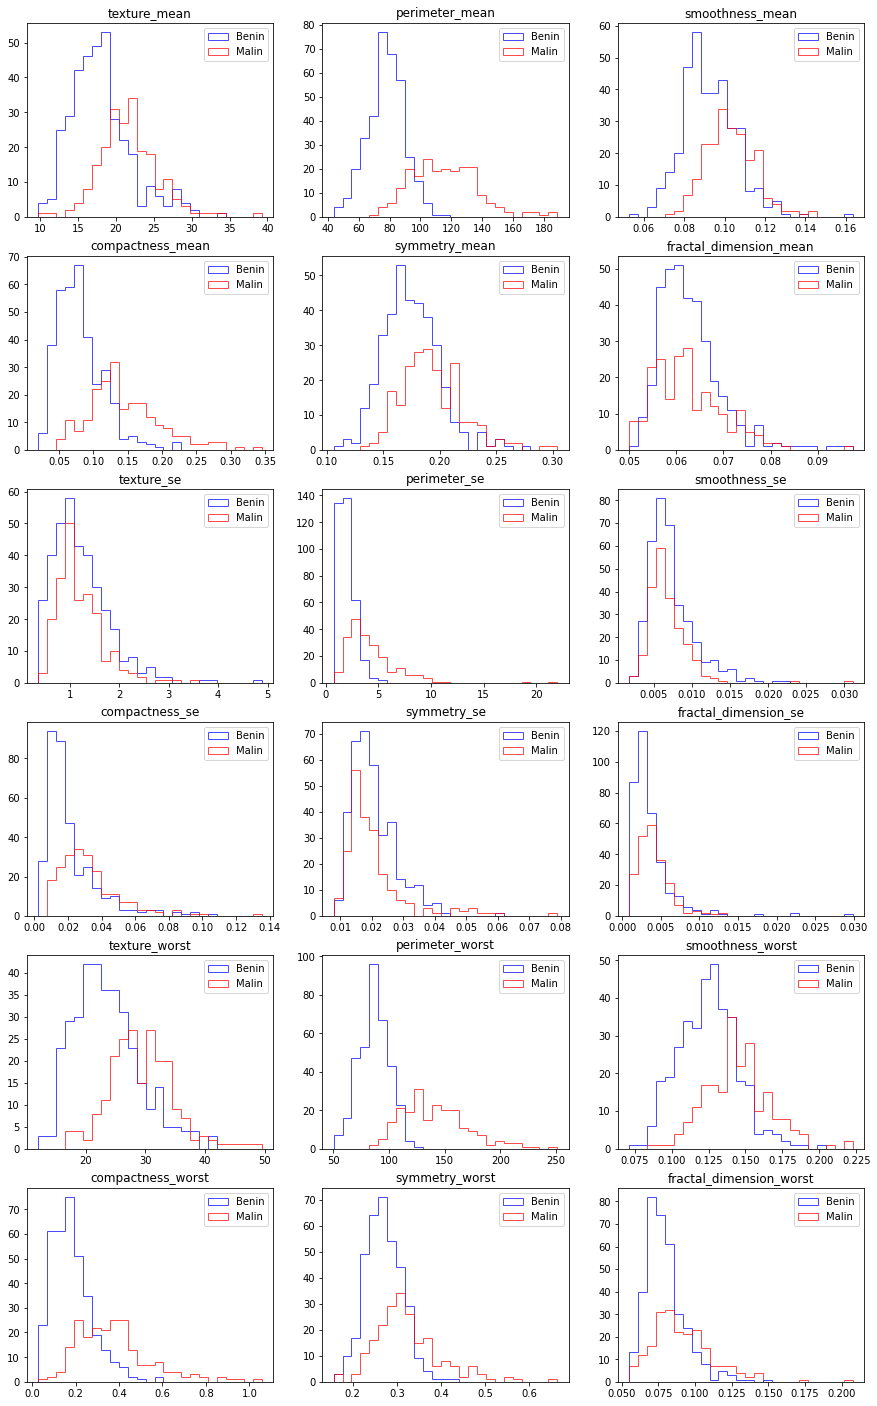

In [78]:
#univariate analysis on each feature to discover those which allow to discretize the variable 'diagnosis'
predict = dataset.diagnosis.unique() #unique values from the diagnosis column 1 and 0
predict_n =['Malin','Benin'] # Labels
fig, axes = plt.subplots(nrows=6, ncols=3, figsize=(15,25)) # axis configuration : 18 features on 6 * 3 charts
i=0
axes = axes.ravel()
for idx,ax in enumerate(axes): # for each chart
    col=dataset.columns[i+2]
    i=i+1
    ax.hist([dataset.loc[dataset.diagnosis == x, col] for x in predict], label=predict_n, bins=25,stacked=False, alpha=0.7,color=['r','b'], histtype='step') # plot the feature histogram 
    ax.legend(loc='upper right') # legend of each chart
    ax.set_title(col) # title

plt.show()

#### Delete features based on the above analysis

In [79]:
col_to_drop_mean=['fractal_dimension_mean', 'symmetry_mean', 'smoothness_mean', 'texture_mean'] # mean variables not efficient for detection
col_to_drop_se=['fractal_dimension_se', 'symmetry_se', 'smoothness_se', 'texture_se'] # Standard error variables not efficient for detection
col_to_drop_worst=['fractal_dimension_worst'] # Worst variable not efficient for detection
col_to_drop_tot=col_to_drop_mean+col_to_drop_se+col_to_drop_worst
dataset.drop(col_to_drop_tot,axis=1,inplace=True)
print('Now the data set is only composed of ', len(dataset.columns), 'features')

Now the data set is only composed of  11 features


In [80]:
dataset.head(5)

,id,diagnosis,perimeter_mean,compactness_mean,perimeter_se,compactness_se,texture_worst,perimeter_worst,smoothness_worst,compactness_worst,symmetry_worst
0,842302,1,122.80,0.27760,8.589,0.04904,17.33,184.60,0.1622,0.6656,0.4601
1,842517,1,132.90,0.07864,3.398,0.01308,23.41,158.80,0.1238,0.1866,0.2750
2,84300903,1,130.00,0.15990,4.585,0.04006,25.53,152.50,0.1444,0.4245,0.3613
3,84348301,1,77.58,0.28390,3.445,0.07458,26.50,98.87,0.2098,0.8663,0.6638
4,84358402,1,135.10,0.13280,5.438,0.02461,16.67,152.20,0.1374,0.2050,0.2364


##### Correlation on the remaining features

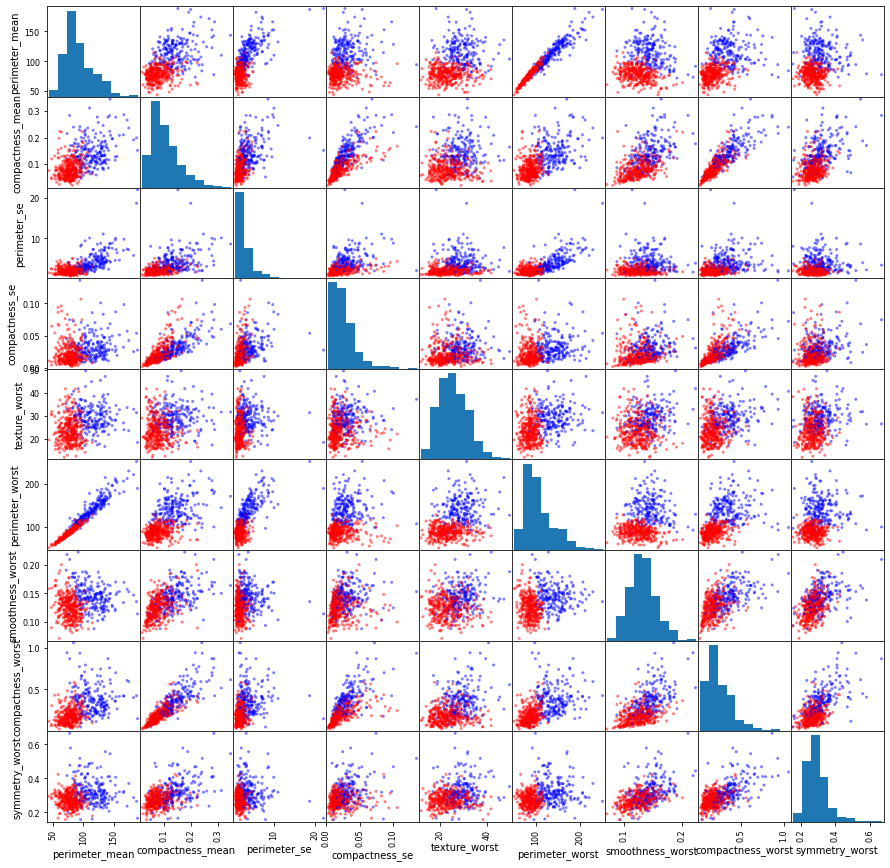

In [81]:
color_function ={0:'red',1:'blue'}
colors =dataset['diagnosis'].map(lambda x: color_function.get(x)) # mapping the color funciton with diagnosis column
pd.plotting.scatter_matrix(dataset.iloc[:,2:],c=colors,alpha =0.5,figsize=(15,15));


most of the features are poorly correlated with each other

In [82]:
# conclusions on features selection:
print('Important features for breast cancer detection are:' )
list(dataset.columns.values[2:])

Important features for breast cancer detection are:


['perimeter_mean',
 'compactness_mean',
 'perimeter_se',
 'compactness_se',
 'texture_worst',
 'perimeter_worst',
 'smoothness_worst',
 'compactness_worst',
 'symmetry_worst']

In concrete terms, the main characteristics of a cell that allow us to predict whether or not it is cancerous are :

1.  the perimeter

2.  the symmetry

3.  the compactness

4.  the smoothness

### Machine Learning Algorithms

I  will test with following algorithms :
Decision Tree, SVM, K-Nearest Neighbors(KNN),Random Forest classifier.

In [83]:
from sklearn.preprocessing import StandardScaler # to scale the data
from sklearn.model_selection import train_test_split# split the data into train and test


# we are going to use few models so lets make a function which we can use with those models.

def clasification_model(model, dataset, prediction_input, output):
    '''
    parameters:
    model: the model we want to use(decision tree, random forest, knn, svm), sklearn object.
    
    dataset: Main dataframe of all data , pandas DF.

    prediction_input: Name of prediction variables (9 features described above , list(str)).

    output: Name of target value(diagnosis(str).

    return:
    None
    (print accuracy and cross-validation for each model).

    '''
    #Fit the model:
    train, test = train_test_split(dataset, test_size = 0.3) # main data is splitted into train (70%) and test (30%) into the function (local variables)
    X_train = train[prediction_input] # taking the training data input 
    y_train=train.diagnosis # This is output of our training data
    
    # same for data testm,
    X_test= test[prediction_input] # taking test data inputs
    y_test =test.diagnosis   #output value of test data
    
    # norm the data with mean of 0 and standard deviation of 1
    sc = StandardScaler() # sklearn object
    sc.fit_transform(dataset[prediction_input]) 
    X_train = sc.transform(X_train) #transform train set with the scaler method
    X_test = sc.transform(X_test) # transform test set with scaler method
    
    model.fit(X_train,y_train) #Here we fit the model using training set
  
    #Make predictions on test set:
    predictions = model.predict(X_test)
  
    # Check accuracy 
    accuracy = metrics.accuracy_score(predictions,y_test)
    print("Accuracy on test set : %s" % "{0:.3%}".format(accuracy))
 # Cross validation on 5 random folds 
    kf = KFold(n_splits=5)
    
    error = []
    print(kf)
    print('  ')
    
    # For each folds, we fit the model and compute the accuracy, to prevent overfitting
    for train, test in kf.split(dataset):
        # as the data is divided into train and test using KFold
        # so here also we are going to fit model
        #in the cross validation the data in train and test will change for evry iteration
        X_train= (dataset[prediction_input].iloc[train,:])# this iloc method is used for selecting trainig data
        y_train = dataset[output].iloc[train]# here is only column so it repersenting only row in train
        X_train= sc.transform(X_train) # Scale the train data
        
        # Training the algorithm using the predictors and target.
        model.fit(X_train, y_train)
    
        # now do this for test data also
        X_test=dataset[prediction_input].iloc[test,:]
        y_test=dataset[output].iloc[test]
        X_test = sc.transform(X_test)
        
        # compute the score on test set
        error.append(model.score(X_test,y_test))
        
        # printing the score 
        print("Cross-Validation Score : %s" % "{0:.3%}".format(np.mean(error)))


### Trying on different models
# Decission Tree

In [84]:
model =DecisionTreeClassifier() # Decision tree model
prediction_var =dataset.columns[2:] # prediction variables
outcome_var ='diagnosis' # outcome variable
clasification_model(model, dataset,prediction_var,outcome_var)

Accuracy on test set : 92.982%
KFold(n_splits=5, random_state=None, shuffle=False)
  
Cross-Validation Score : 93.860%
Cross-Validation Score : 93.421%
Cross-Validation Score : 93.860%
Cross-Validation Score : 93.860%
Cross-Validation Score : 92.964%


### SVM

In [85]:
model =svm.SVC() # SVM model
clasification_model(model, dataset,prediction_var,outcome_var)

Accuracy on test set : 95.906%
KFold(n_splits=5, random_state=None, shuffle=False)
  
Cross-Validation Score : 93.860%
Cross-Validation Score : 96.053%
Cross-Validation Score : 96.491%
Cross-Validation Score : 96.711%
Cross-Validation Score : 96.306%


## KNN model

In [86]:
model =KNeighborsClassifier() # KNN model
clasification_model(model, dataset,prediction_var,outcome_var)


Accuracy on test set : 94.737%
KFold(n_splits=5, random_state=None, shuffle=False)
  
Cross-Validation Score : 90.351%
Cross-Validation Score : 92.982%
Cross-Validation Score : 94.152%
Cross-Validation Score : 95.175%
Cross-Validation Score : 94.724%


# Random forest

In [87]:
model =RandomForestClassifier() # Random forest model
clasification_model(model, dataset,prediction_var,outcome_var)

Accuracy on test set : 95.906%
KFold(n_splits=5, random_state=None, shuffle=False)
  
Cross-Validation Score : 89.474%
Cross-Validation Score : 93.421%
Cross-Validation Score : 95.322%
Cross-Validation Score : 95.614%
Cross-Validation Score : 94.898%


The best model is seems to be  SVM. so lets optimize it with a GridSearchCV to tune hyperparameters

In [88]:
# lets make a function for Grid search CV
def Classification_model_gridsearchCV(model,param_grid,X_data,y_data):
    '''
    parameters:
    model: the model we want to tune(SVM).
    
    param_grid: dictionary of all hyperparameters of the model we want to optimize.

    X_data: train features data.

    y_data: train predicton data.

    return:
    None
    (print parameters and estimator associated with the scores).

    '''
    clf = GridSearchCV(model, param_grid, cv =10,scoring ='accuracy') # parameters are those we want to tune, CV = cross validation accuracy

    #Fit all models with all hyperparameters configurations.
    clf.fit(X_train,y_train)
    print('the best parameters found on developmet set is:')

    # This will give us best parameters
    print(clf.best_params_)
    print('the best estimator is:')
    print(clf.best_estimator_)
    print('The best score is: ')

    print(clf.best_score_*100, '%')



In [89]:
#now split our data into train and test
train, test = train_test_split(dataset, test_size = 0.3)# in this our main data is splitted into train and test

X_train = train[prediction_var]# taking the training data input 
y_train=train.diagnosis# This is output of our training data

# same for test set
X_test= test[prediction_var] # taking test data inputs
y_test =test.diagnosis   #output value of test data

# scale data
sc = StandardScaler()
sc.fit_transform(dataset[prediction_var])
X_train = sc.transform(X_train)
X_test = sc.transform(X_test)

# Here we have to take parameters that are used for SVM Classifier
    # C: Regularization parameter. The strength of the regularization is inversely proportional to C. 
    # kernel : Specifies the kernel type to be used in the algorithm.

param_grid = {'C': [0.65,0.75,0.8,1], 
              'kernel': [ 'linear','poly','rbf','sigmoid'],
                }
# here our gridasearchCV will take all combinations of these parameter and apply it to model 
# and then it will find the best parameter for model
model= svm.SVC()
Classification_model_gridsearchCV(model,param_grid,X_train,y_train) # call the function

the best parameters found on developmet set is:
{'C': 0.75, 'kernel': 'rbf'}
the best estimator is:
SVC(C=0.75)
The best score is: 
97.47435897435898 %


### Machine Learning conclusions
 the best machine learning model tested is SVM with (C=0.75, Kernel ='rbf')
 Let's compute some metrics with this model(accuracy, precision, recall, f1-score), Confusion Matrix and ROC curve

In [90]:
model = svm.SVC(C=0.75,kernel='rbf') # here we are using the best parameter that we found in gridsearchCV
model.fit(X_train,y_train)# fit the model for training dataset
prediction=model.predict(X_test) # predict the value for test dataset

# Here we are going to accuracy measurement between our predicted value and test output values
print('----------------------------------------')
print('Accuracy of our model is:', metrics.accuracy_score(prediction,y_test)*100,'%')

----------------------------------------
Accuracy of our model is: 94.73684210526315 %


In [92]:
from sklearn.metrics import precision_score, f1_score,recall_score

# precision quantifies the number of positive class predictioans that are actually  belongs to positive class class

precision =precision_score(y_test,prediction, average ='binary')

# recall quantifies the number of positive class predictions made out of all positive examples in the dataset_type

recall =recall_score(y_test,prediction,average ='binary')

# F Measure provides a single score that balances both the concerns of precision and recall.

score =f1_score(y_test,prediction,average ='binary')


print('precision:',precision*100,'%')

print('------------------------------')
print('recall:',recall*100,'%')
print('-------------------------------')
print('F1 score:',score*100,'%')


precision: 93.75 %
------------------------------
recall: 92.3076923076923 %
-------------------------------
F1 score: 93.02325581395348 %


The best score to considerate is Recall because in cancer detection we want to minimize False Negatives
(e.g: Prediction of non-cancerous tumor when it is)

d:\projects_interview\Heathcare\Brest cancer(ML and DL)\brest_cancer_prediction\brest_cancer\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
d:\projects_interview\Heathcare\Brest cancer(ML and DL)\brest_cancer_prediction\brest_cancer\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


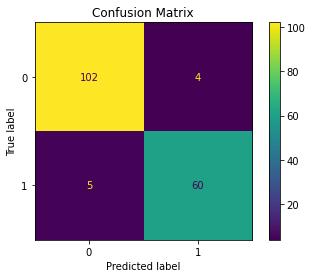

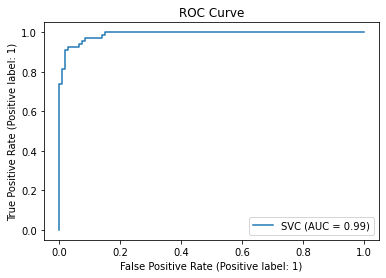

In [95]:
# Plotting a Consusion Matrix and ROC curve

from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(model, X_test, y_test)
plt.title('Confusion Matrix')
metrics.plot_roc_curve(model, X_test, y_test) 
plt.title('ROC Curve')
plt.show()



#### Summary of the results

##### Good accuracy with only 9 features : 98.24% (We make the right prediction in 98.24% of the cases)

##### Good Recall : 96.77 % but it is not 100% so we do not detect all cancerous tumor ! It is very problematic !

##### So, the main problem is that a cancerous tumor is not detected in all cases. ( X patients are not detected as having a cancerous tumor : Value at the bottom left in the confusion matrix).
##### Let's see with Deep Learing methods if we can decrease the number of cancerous cells non-detected

# Simple Deep Learning  Algorithm

In [100]:
import keras
from keras.models import Sequential
from keras.layers import Dropout
from keras.layers import Dense


classifier =Sequential()

#Adding the input layer and first hidden layer

classifier.add(Dense(16, activation = 'relu',input_dim =9))

#Adding dropout to prevent verfitting

classifier.add(Dropout(rate=0.1))


#Adding the second hidden layer
classifier.add(Dense(16, activation = 'relu'))
#Adding dropout to prevent verfitting

classifier.add(Dropout(rate=0.1))

#Adding the output layers
classifier.add(Dense(1, activation ='sigmoid'))

#Compiling the ANN
classifier.compile(optimizer ='adam', loss ='binary_crossentropy', metrics =['accuracy'])

# optimizer is choosen adam for gredict decent and Binary cross entropy is used for loss function

# Fitting the ANN to the training set

classifier.fit(X_train,y_train, batch_size =75, epochs =120)

y_pred =classifier.predict(X_test)
y_pred =(y_pred >0.5)


Epoch 1/120
6/6 [==============================] - 0s 1ms/step - loss: 0.8430 - accuracy: 0.3291
Epoch 2/120
6/6 [==============================] - 0s 1ms/step - loss: 0.8134 - accuracy: 0.3241
Epoch 3/120
6/6 [==============================] - 0s 1ms/step - loss: 0.7681 - accuracy: 0.4020
Epoch 4/120
6/6 [==============================] - 0s 2ms/step - loss: 0.7442 - accuracy: 0.4347
Epoch 5/120
6/6 [==============================] - 0s 2ms/step - loss: 0.6869 - accuracy: 0.5452
Epoch 6/120
6/6 [==============================] - 0s 2ms/step - loss: 0.6780 - accuracy: 0.5779
Epoch 7/120
6/6 [==============================] - 0s 2ms/step - loss: 0.6399 - accuracy: 0.6859
Epoch 8/120
6/6 [==============================] - 0s 2ms/step - loss: 0.6112 - accuracy: 0.7613
Epoch 9/120
6/6 [==============================] - 0s 2ms/step - loss: 0.5966 - accuracy: 0.7864
Epoch 10/120
6/6 [==============================] - 0s 2ms/step - loss: 0.5780 - accuracy: 0.7940
Epoch 11/120
6/6 [===========

In [101]:
# Precision quantifies the number of positive class predictions that actually belong to the positive class.
precision = precision_score(y_test, y_pred, average='binary')

# Recall quantifies the number of positive class predictions made out of all positive examples in the dataset.
recall = recall_score(y_test, y_pred, average='binary')

# F-Measure provides a single score that balances both the concerns of precision and recall.
score = f1_score(y_test, y_pred, average='binary')

print('Precision : ',precision *100 ,' %')
print('------------------------')
print('Recall : ' ,recall*100 ,' %') # Best score to considerate in our case beacause Recall is appropriate when minimizing False Negatives. 
print('------------------------')
print('F1_score : ', score*100 ,' %')


Precision :  92.42424242424242  %
------------------------
Recall :  93.84615384615384  %
------------------------
F1_score :  93.12977099236642  %


<AxesSubplot:>

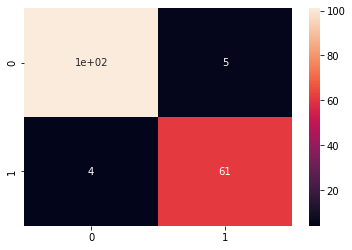

In [102]:
from sklearn.metrics import confusion_matrix
cm =confusion_matrix(y_test,y_pred)
sns.heatmap(cm,annot=True)

##### TheSummary Deep Learning
##### The Recall Score seems to be better than with ML methods : 96.875 %
##### But always 3 cancerous tumor are not detected...

7. Conclusion
#### The current techniques in terms of AI enable to obtain satisfactory results at first sight (> 95% of good prediction).

#### However, it is almost impossible to obtain 100% good predictions, so the real issue is how to deal with cases where the algorithm predicts that a patient is healthy when in fact he has a cancerous tumor?

#### Fully automating the breast cancer detection process is still impossible with the techniques mentioned above, although we are getting closer and closer to 100% accuracy. (We will probably never reach it...)